# Wine Dataset

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [71]:
#Data Load

In [72]:
ds= pd.read_csv('wine-data.csv')
ds

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [73]:
df_wine=pd.DataFrame(data=ds)
df_wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [74]:
df_wine.shape

(178, 14)

In [75]:
df_wine.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
       'Proline    '],
      dtype='object')

In [76]:
df_wine.dtypes

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
diluted wines           float64
Proline                   int64
dtype: object

In [77]:
df_wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [78]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  diluted wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [79]:
df_wine.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

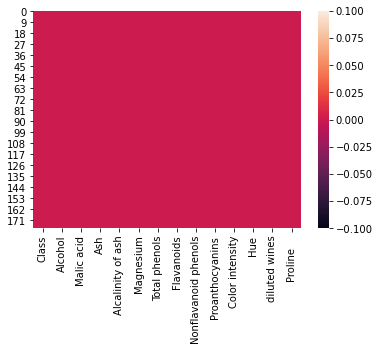

In [80]:
sns.heatmap(df_wine.isnull())

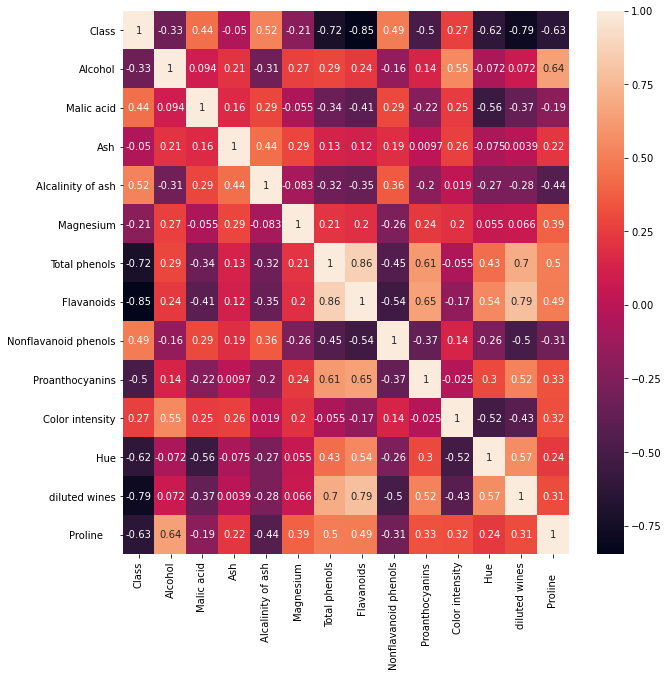

In [81]:
#co-relation graph
plt.figure(figsize=(10,10))
sns.heatmap(df_wine.corr(),annot=True)
plt.show()

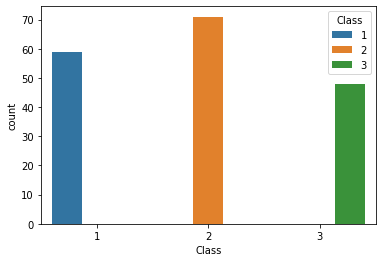

In [82]:
sns.countplot(x='Class',hue='Class',data=df_wine)

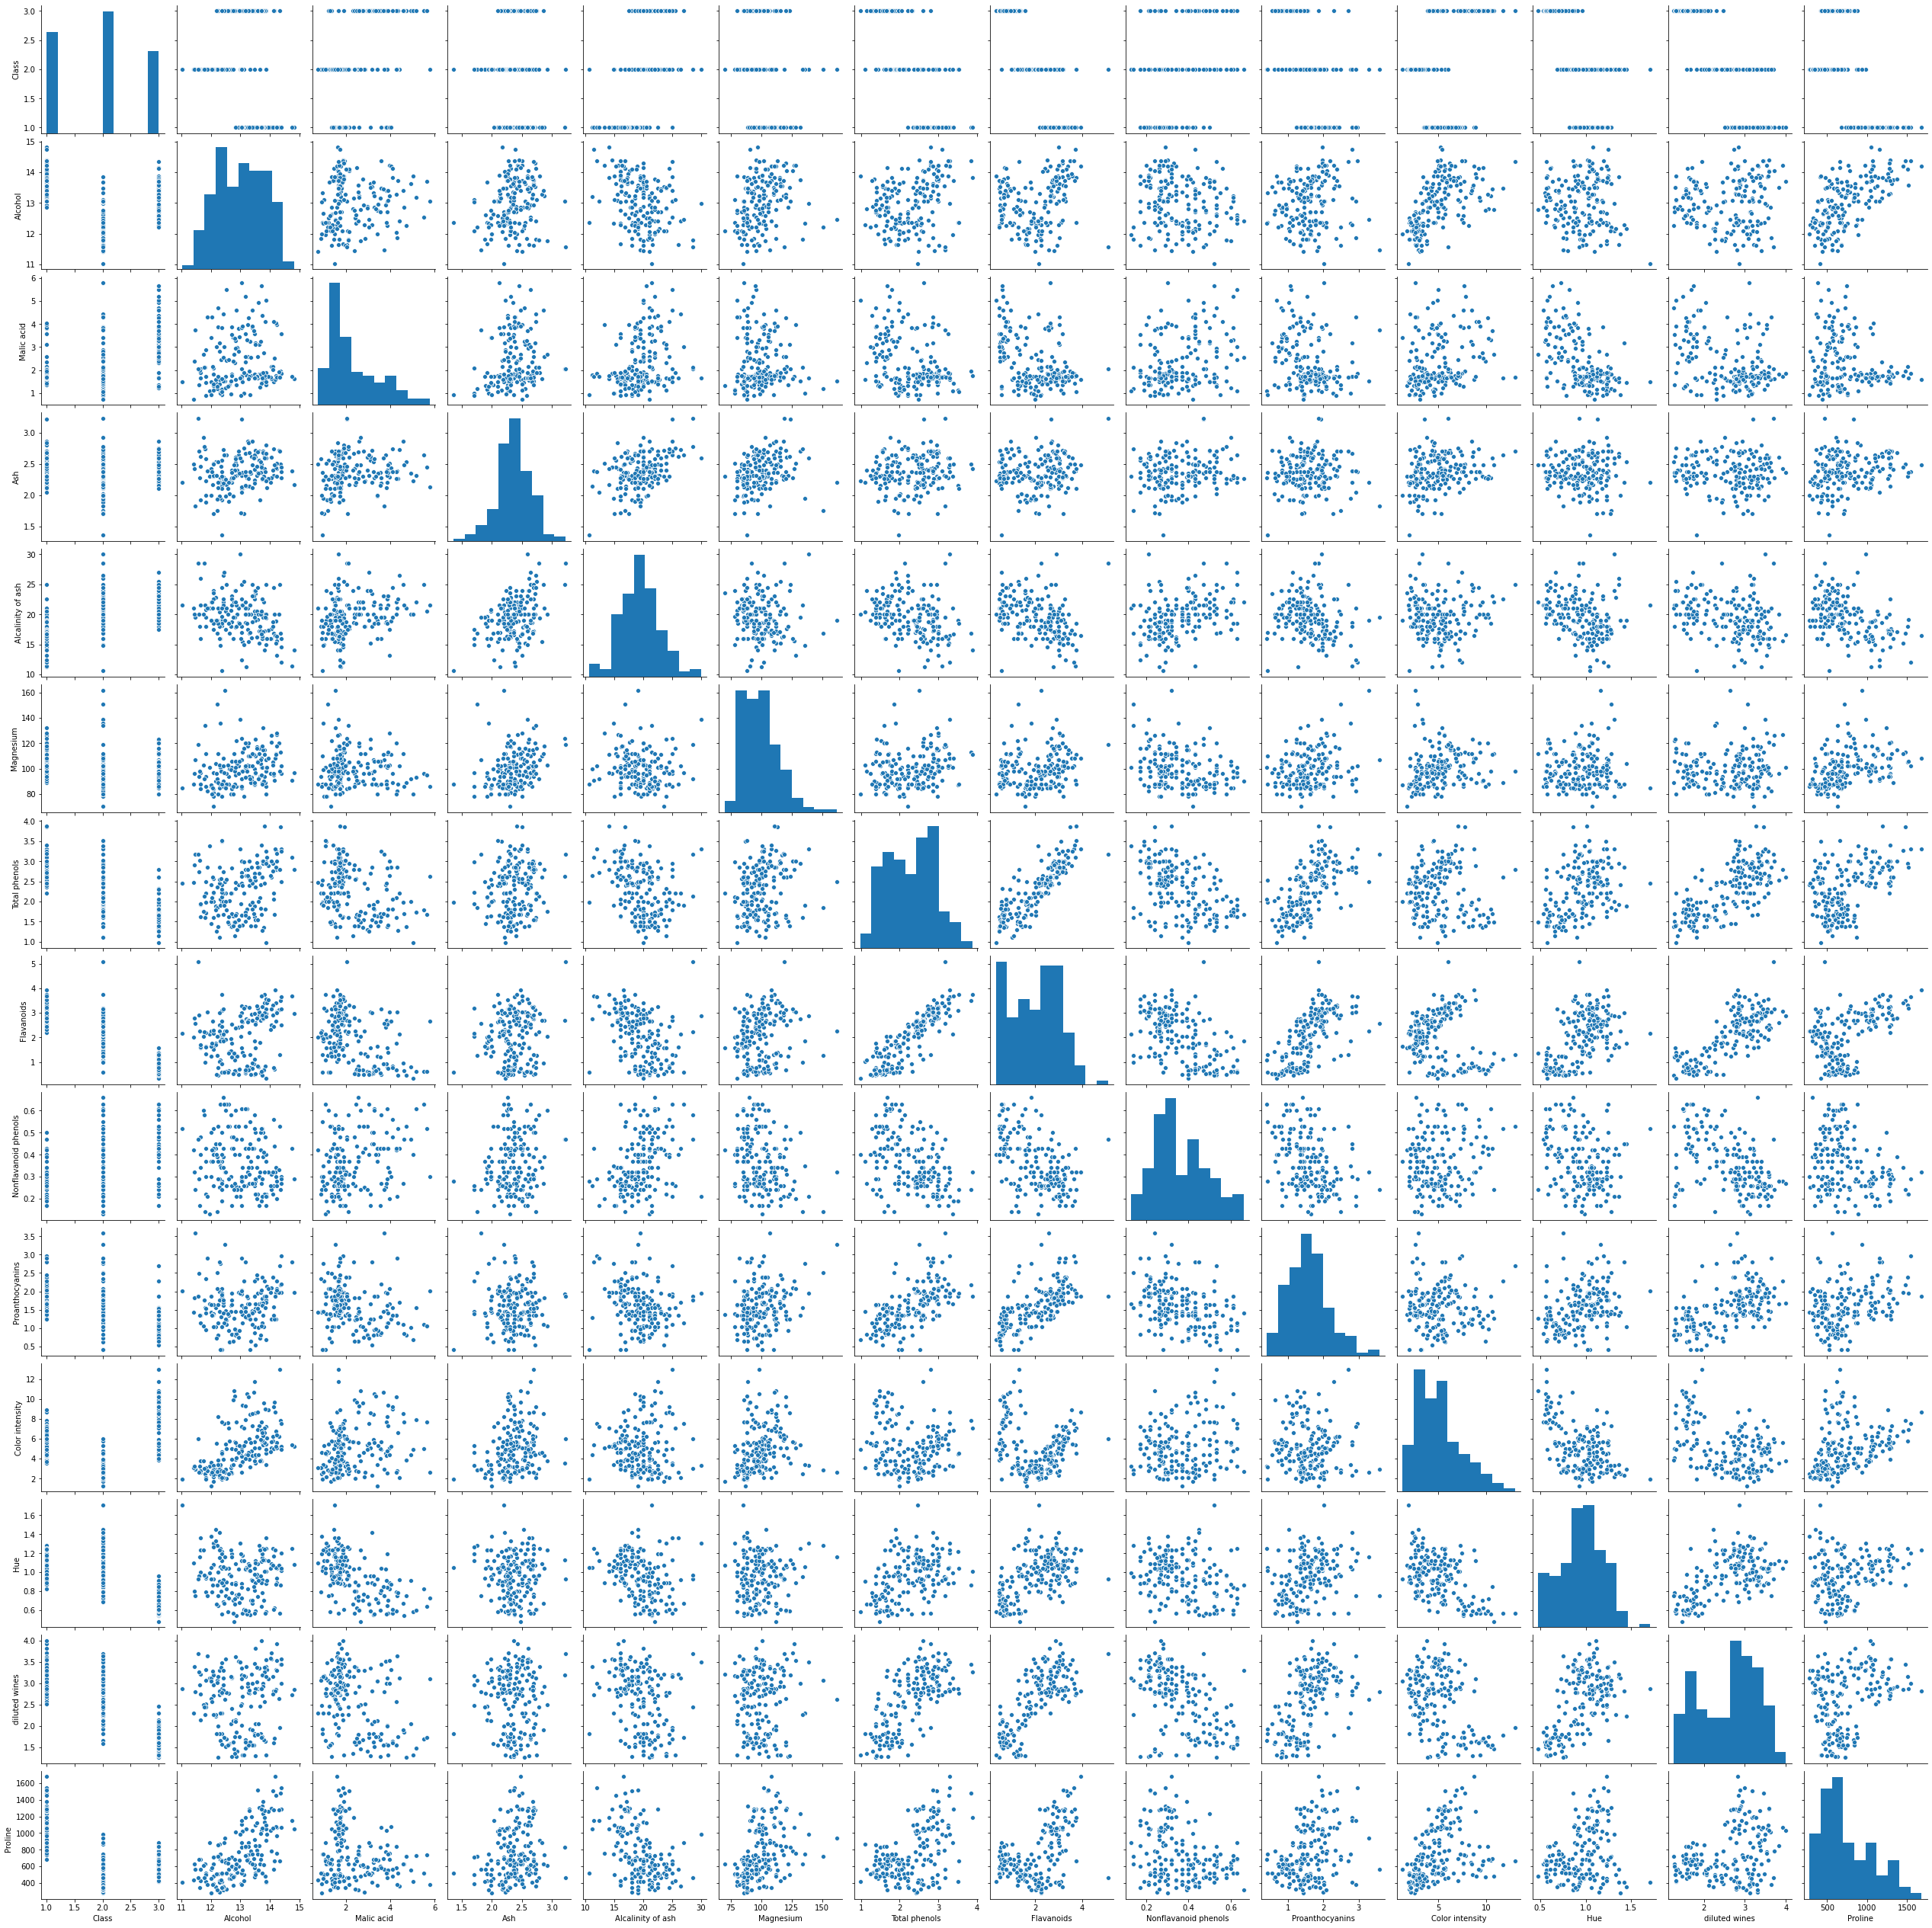

In [83]:
sns.pairplot(df_wine)

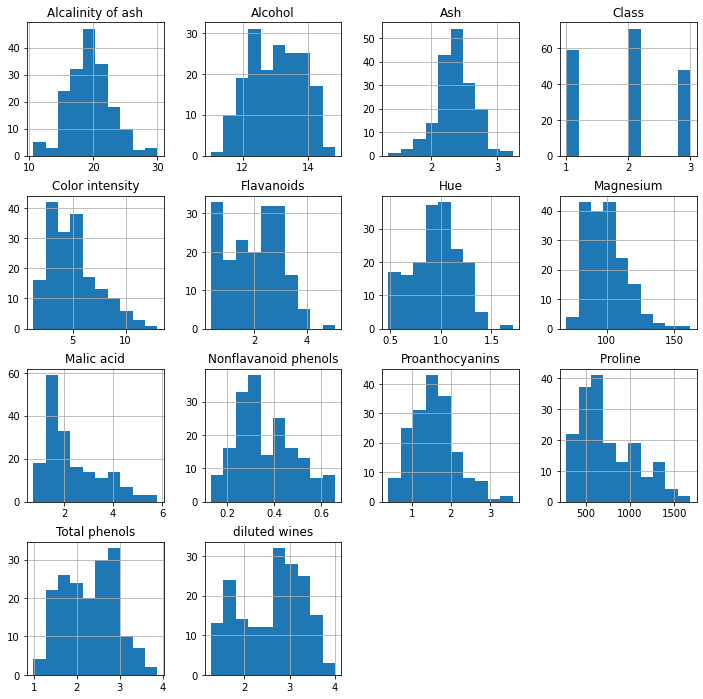

In [84]:
df_wine.hist(figsize=(12,12))
plt.show()

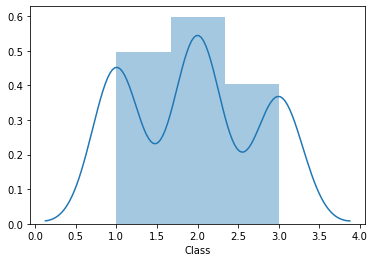

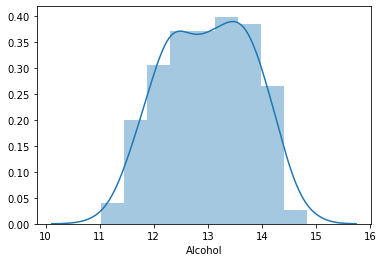

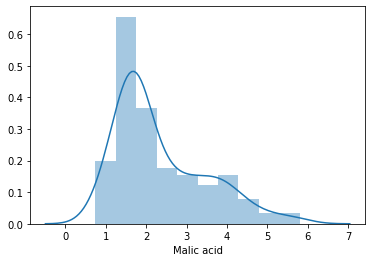

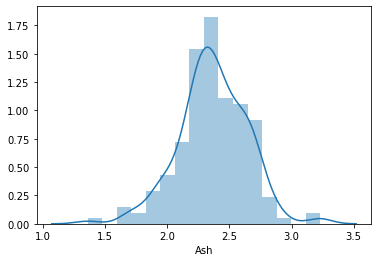

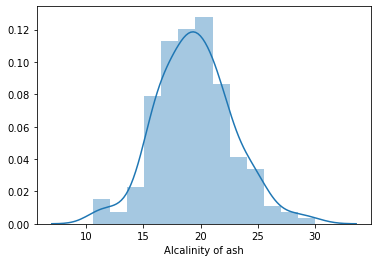

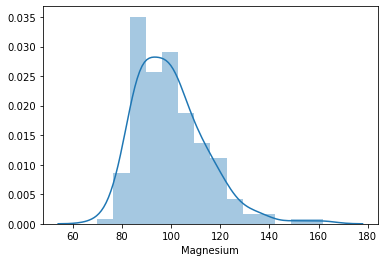

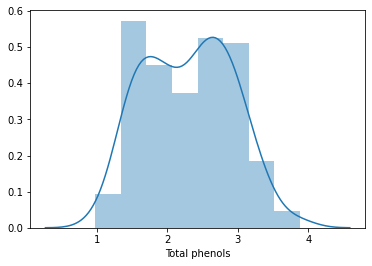

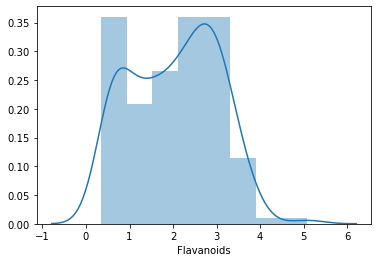

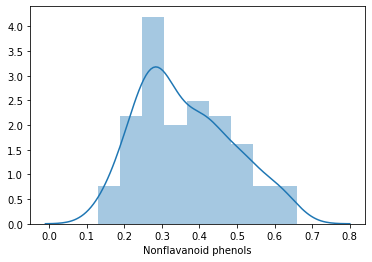

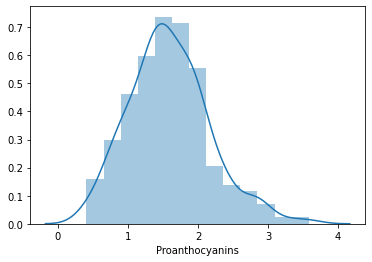

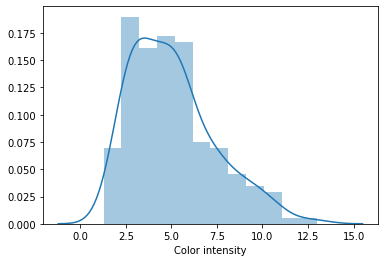

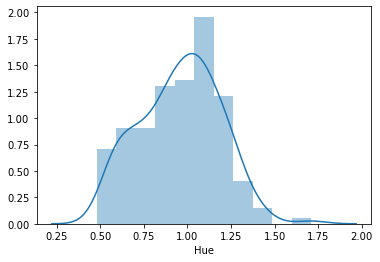

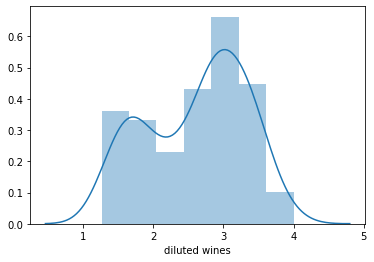

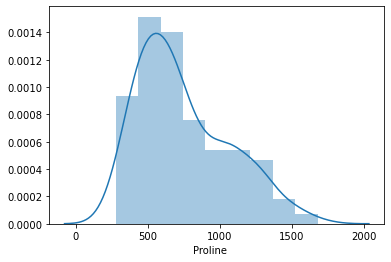

In [85]:
for i in df_wine.columns:
    plt.figure()
    sns.distplot(df_wine[i])

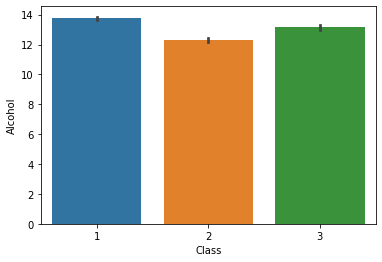

In [86]:
sns.barplot(x='Class',y='Alcohol',data=df_wine)

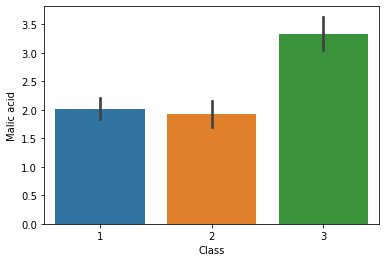

In [87]:
sns.barplot(x='Class',y='Malic acid',data=df_wine)

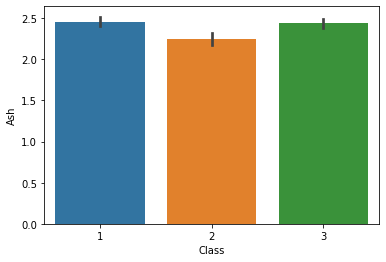

In [88]:
sns.barplot(x='Class',y='Ash',data=df_wine)

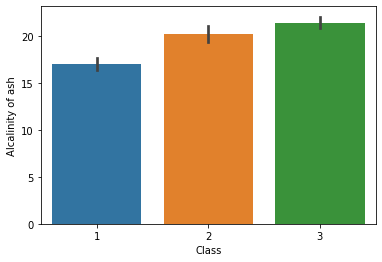

In [89]:
sns.barplot(x='Class',y='Alcalinity of ash',data=df_wine)

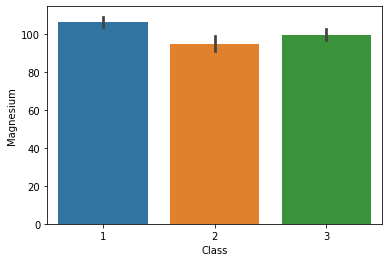

In [90]:
sns.barplot(x='Class',y='Magnesium',data=df_wine)

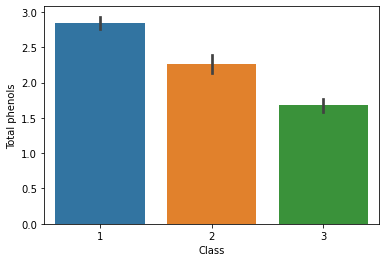

In [91]:
sns.barplot(x='Class',y='Total phenols',data=df_wine)

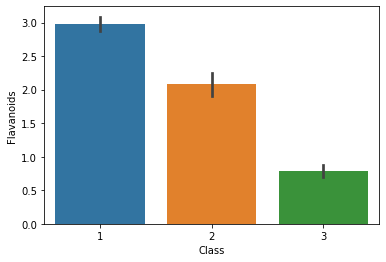

In [92]:
sns.barplot(x='Class',y='Flavanoids',data=df_wine)

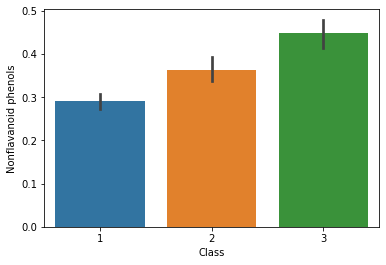

In [93]:
sns.barplot(x='Class',y='Nonflavanoid phenols',data=df_wine)

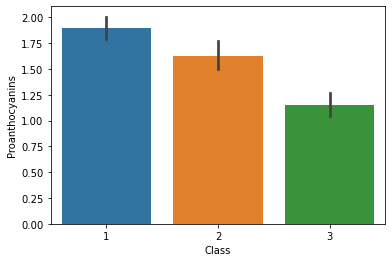

In [94]:
sns.barplot(x='Class',y='Proanthocyanins',data=df_wine)

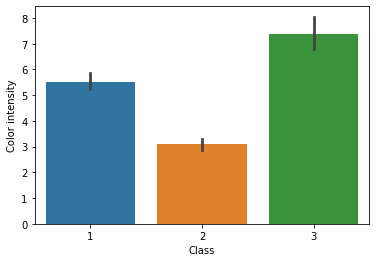

In [95]:
sns.barplot(x='Class',y='Color intensity',data=df_wine)

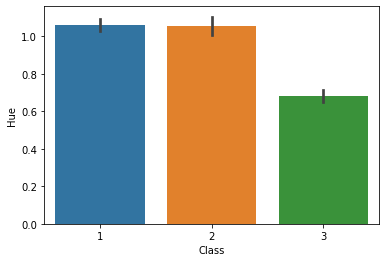

In [96]:
sns.barplot(x='Class',y='Hue',data=df_wine)

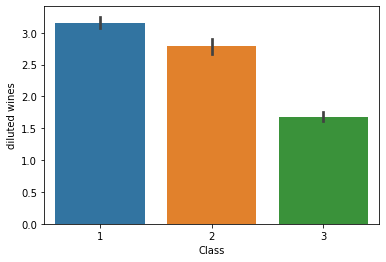

In [97]:
sns.barplot(x='Class',y='diluted wines',data=df_wine)

In [145]:
df_wine.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

In [149]:
#skewness treating using log
for columns in df_wine.columns:
    if df_wine.skew().loc[columns]>0.55:
        df_wine[columns]=np.log1p(df_wine[columns])

In [151]:
#Again check skewness
df_wine.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              0.529222
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               0.527327
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.097222
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.087930
dtype: float64

Class                       AxesSubplot(0.125,0.71587;0.168478x0.16413)
Alcohol                  AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Malic acid               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Ash                      AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Alcalinity of ash          AxesSubplot(0.125,0.518913;0.168478x0.16413)
Magnesium               AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Total phenols           AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Flavanoids              AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Nonflavanoid phenols       AxesSubplot(0.125,0.321957;0.168478x0.16413)
Proanthocyanins         AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Color intensity         AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Hue                     AxesSubplot(0.731522,0.321957;0.168478x0.16413)
diluted wines                 AxesSubplot(0.125,0.125;0.168478x0.16413)
Proline                    AxesSubplot(0.327174,0.125;0.168478x0

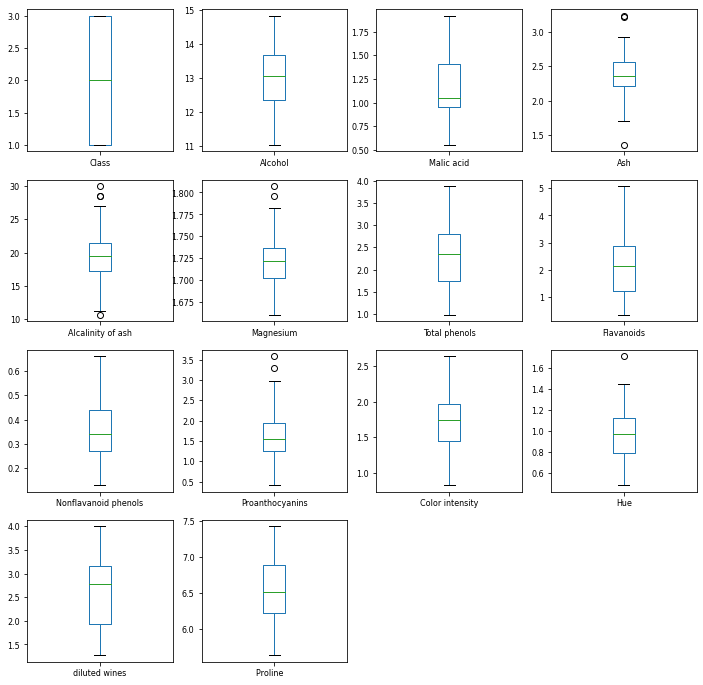

In [152]:
df_wine.plot(kind='box',subplots=True,layout=(4,4),fontsize=8,figsize=(12,12))

In [153]:
#remove outliers
from scipy.stats import zscore
z_score=abs(zscore(df_wine))
print(df_wine.shape)
wine_data_new=df_wine.loc[(z_score<3)]
print(wine_data_new.shape)

(178, 14)
(2483, 14)


In [154]:
wine_data_new.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,0.996949,2.43,15.6,1.766789,2.8,3.06,0.28,2.29,1.893112,1.04,3.92,6.971669
0,1,14.23,0.996949,2.43,15.6,1.766789,2.8,3.06,0.28,2.29,1.893112,1.04,3.92,6.971669
0,1,14.23,0.996949,2.43,15.6,1.766789,2.8,3.06,0.28,2.29,1.893112,1.04,3.92,6.971669
0,1,14.23,0.996949,2.43,15.6,1.766789,2.8,3.06,0.28,2.29,1.893112,1.04,3.92,6.971669
0,1,14.23,0.996949,2.43,15.6,1.766789,2.8,3.06,0.28,2.29,1.893112,1.04,3.92,6.971669


In [155]:
wine_data_new.shape

(2483, 14)

In [156]:
x=wine_data_new.iloc[:,1:-1]
x

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines
0,14.23,0.996949,2.43,15.6,1.766789,2.80,3.06,0.28,2.29,1.893112,1.04,3.92
0,14.23,0.996949,2.43,15.6,1.766789,2.80,3.06,0.28,2.29,1.893112,1.04,3.92
0,14.23,0.996949,2.43,15.6,1.766789,2.80,3.06,0.28,2.29,1.893112,1.04,3.92
0,14.23,0.996949,2.43,15.6,1.766789,2.80,3.06,0.28,2.29,1.893112,1.04,3.92
0,14.23,0.996949,2.43,15.6,1.766789,2.80,3.06,0.28,2.29,1.893112,1.04,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...
177,14.13,1.629241,2.74,24.5,1.718240,2.05,0.76,0.56,1.35,2.322388,0.61,1.60
177,14.13,1.629241,2.74,24.5,1.718240,2.05,0.76,0.56,1.35,2.322388,0.61,1.60
177,14.13,1.629241,2.74,24.5,1.718240,2.05,0.76,0.56,1.35,2.322388,0.61,1.60
177,14.13,1.629241,2.74,24.5,1.718240,2.05,0.76,0.56,1.35,2.322388,0.61,1.60


In [157]:
x.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines
0,14.23,0.996949,2.43,15.6,1.766789,2.8,3.06,0.28,2.29,1.893112,1.04,3.92
0,14.23,0.996949,2.43,15.6,1.766789,2.8,3.06,0.28,2.29,1.893112,1.04,3.92
0,14.23,0.996949,2.43,15.6,1.766789,2.8,3.06,0.28,2.29,1.893112,1.04,3.92
0,14.23,0.996949,2.43,15.6,1.766789,2.8,3.06,0.28,2.29,1.893112,1.04,3.92
0,14.23,0.996949,2.43,15.6,1.766789,2.8,3.06,0.28,2.29,1.893112,1.04,3.92


In [158]:
x.shape

(2483, 12)

In [159]:
y=wine_data_new.iloc[:,0]
y

0      1
0      1
0      1
0      1
0      1
      ..
177    3
177    3
177    3
177    3
177    3
Name: Class, Length: 2483, dtype: int64

In [160]:
y.shape

(2483,)

In [253]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=30)

In [254]:
x_train.shape

(1936, 12)

In [255]:
y_train.shape

(1936,)

In [256]:
x_test.shape

(547, 12)

In [257]:
y_test.shape

(547,)

In [258]:
lg=LogisticRegression()

In [259]:
lg.fit(x_train,y_train)

LogisticRegression()

In [260]:
lg.score(x_train,y_train)

0.9943181818181818

In [261]:
pred=lg.predict(x_test)
print(pred)

[1 2 1 3 3 3 1 3 2 3 1 2 2 1 2 3 3 2 3 1 1 3 3 3 1 2 2 3 2 3 1 3 1 3 3 1 2
 2 3 1 1 1 2 2 2 3 3 1 2 3 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 2 3 2 2 1 1 2 2 2
 1 3 1 1 3 3 1 3 2 2 3 3 2 2 2 2 1 1 2 1 3 2 2 1 3 3 2 2 2 1 3 3 1 1 1 2 1
 2 1 3 1 2 2 1 2 1 2 2 3 3 2 3 1 2 2 2 1 1 2 2 2 3 2 3 2 2 2 1 1 1 3 2 2 2
 2 1 1 2 2 2 1 2 2 1 2 3 3 1 3 3 1 2 3 1 2 2 3 3 3 2 2 3 2 2 2 2 1 1 1 2 2
 2 1 2 3 1 2 3 3 1 1 2 2 3 1 2 2 1 3 1 3 1 2 1 2 3 1 3 2 1 3 1 1 3 2 2 1 2
 3 3 1 3 3 3 1 2 3 1 1 2 1 2 1 1 3 2 2 1 3 3 2 3 1 2 2 1 1 3 2 1 3 1 1 1 2
 2 3 1 3 1 2 2 2 1 3 2 2 3 2 3 2 3 3 1 2 1 2 2 1 3 3 1 2 3 2 2 2 1 1 1 1 2
 2 2 2 2 1 1 1 1 2 2 2 1 2 2 1 1 3 2 3 3 2 3 3 2 3 2 1 1 2 2 2 3 3 1 3 2 2
 2 3 3 2 3 2 2 1 1 2 2 2 2 1 3 1 2 3 2 2 1 1 2 1 3 2 3 3 2 3 2 2 3 1 2 1 1
 1 1 1 2 2 2 2 2 3 2 2 3 2 2 3 1 2 2 3 1 2 2 3 3 2 3 1 3 2 3 2 2 1 1 2 2 3
 3 2 1 3 3 1 2 2 2 3 1 1 1 2 2 2 2 1 2 1 3 2 1 1 3 3 2 3 2 2 2 1 2 1 2 3 2
 1 1 2 2 1 2 2 1 3 2 2 2 1 2 3 2 2 1 2 2 3 2 1 2 2 1 2 3 1 1 2 2 3 1 2 1 3
 2 1 1 2 2 1 2 1 3 2 3 1 

In [262]:
print('Predicted  values and actual values',pred,y_test)

Predicted  values and actual values [1 2 1 3 3 3 1 3 2 3 1 2 2 1 2 3 3 2 3 1 1 3 3 3 1 2 2 3 2 3 1 3 1 3 3 1 2
 2 3 1 1 1 2 2 2 3 3 1 2 3 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 2 3 2 2 1 1 2 2 2
 1 3 1 1 3 3 1 3 2 2 3 3 2 2 2 2 1 1 2 1 3 2 2 1 3 3 2 2 2 1 3 3 1 1 1 2 1
 2 1 3 1 2 2 1 2 1 2 2 3 3 2 3 1 2 2 2 1 1 2 2 2 3 2 3 2 2 2 1 1 1 3 2 2 2
 2 1 1 2 2 2 1 2 2 1 2 3 3 1 3 3 1 2 3 1 2 2 3 3 3 2 2 3 2 2 2 2 1 1 1 2 2
 2 1 2 3 1 2 3 3 1 1 2 2 3 1 2 2 1 3 1 3 1 2 1 2 3 1 3 2 1 3 1 1 3 2 2 1 2
 3 3 1 3 3 3 1 2 3 1 1 2 1 2 1 1 3 2 2 1 3 3 2 3 1 2 2 1 1 3 2 1 3 1 1 1 2
 2 3 1 3 1 2 2 2 1 3 2 2 3 2 3 2 3 3 1 2 1 2 2 1 3 3 1 2 3 2 2 2 1 1 1 1 2
 2 2 2 2 1 1 1 1 2 2 2 1 2 2 1 1 3 2 3 3 2 3 3 2 3 2 1 1 2 2 2 3 3 1 3 2 2
 2 3 3 2 3 2 2 1 1 2 2 2 2 1 3 1 2 3 2 2 1 1 2 1 3 2 3 3 2 3 2 2 3 1 2 1 1
 1 1 1 2 2 2 2 2 3 2 2 3 2 2 3 1 2 2 3 1 2 2 3 3 2 3 1 3 2 3 2 2 1 1 2 2 3
 3 2 1 3 3 1 2 2 2 3 1 1 1 2 2 2 2 1 2 1 3 2 1 1 3 3 2 3 2 2 2 1 2 1 2 3 2
 1 1 2 2 1 2 2 1 3 2 2 2 1 2 3 2 2 1 2 2 3 2 1 2 2 1 2 3 1 1 2 2

In [263]:
print('accuracy_score:',accuracy_score(y_test,pred))

accuracy_score: 0.9963436928702011


[[164   2   0]
 [  0 243   0]
 [  0   0 138]]


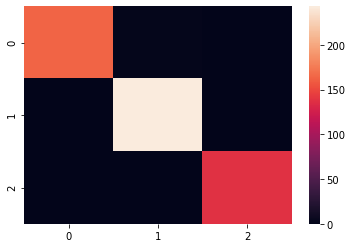

In [264]:
print (confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))

In [266]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       166
           2       0.99      1.00      1.00       243
           3       1.00      1.00      1.00       138

    accuracy                           1.00       547
   macro avg       1.00      1.00      1.00       547
weighted avg       1.00      1.00      1.00       547



In [267]:
#lets make one test
def predicttest(testvalue):
    testvalue=testvalue.reshape(1,-1)
    t=lg.predict(testvalue)
    print(t)

In [268]:
testv=np.array([2.9,1,8,2,9,10,52,2.6,15,4,3.8,0.2])
predicttest(testv)

[2]
